<a href="https://colab.research.google.com/github/re-compsci/CIFAR10_CNN_Project/blob/main/Deep_leaerning_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

#load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
from tensorflow.keras.utils import to_categorical

#label encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
import tensorflow as tf

#resizing and normlizing
x_train = tf.image.resize(x_train, (80, 80)) / 255.0
x_test = tf.image.resize(x_test, (80, 80)) / 255.0

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Augmentation
augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

augmentation.fit(x_train)

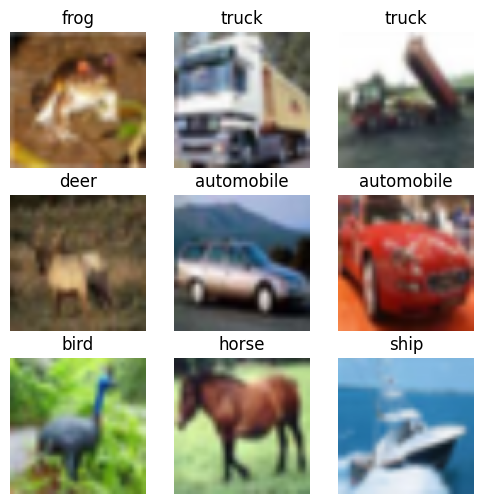

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#visulization
def show_images(images, labels, ncols=3, nrows=3):
    plt.figure(figsize=(6, 6))
    for i in range(ncols * nrows):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

show_images(x_train, y_train, ncols=3, nrows=3)

In [6]:
#data already split training and set
print("training data shape:", x_train.shape)
print("test data shape:", x_test.shape)

training data shape: (50000, 80, 80, 3)
test data shape: (10000, 80, 80, 3)


In [15]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2



#prepare 1st model CNN

model = Sequential(
    [
        keras.Input(shape=(80,80,3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = 'same',kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = 'same'),
        BatchNormalization(),

        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding = 'same',kernel_regularizer=l2(0.0005)),
        BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding = 'same'),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding = 'same',kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding = 'same'),
        BatchNormalization(),

        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),

        layers.Dropout(0.5),

        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 80, 80, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 80, 80, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 80, 80, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 80, 80, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 40, 40, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 40, 40, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 40, 40, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 40, 40, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 20, 20, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 20, 20, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 20, 20, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │         128,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 416,810 (1.59 MB)

 Trainable params: 415,914 (1.59 MB)

 Non-trainable params: 896 (3.50 KB)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

#train the model
batch_size = 400*2

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(augmentation.flow(x_train, y_train, batch_size=batch_size),
          epochs=20,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])
#accuracy: 0.7043 -  val_accuracy: 0.7097

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.2500 - loss: 3.4652 - val_accuracy: 0.1001 - val_loss: 2.8965
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.3765 - loss: 2.1655 - val_accuracy: 0.1239 - val_loss: 3.8706
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.4201 - loss: 2.0620 - val_accuracy: 0.1432 - val_loss: 3.2309
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.4764 - loss: 1.8483 - val_accuracy: 0.1227 - val_loss: 3.4722
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5194 - loss: 1.7349 - val_accuracy: 0.1605 - val_loss: 2.7016
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5448 - loss: 1.7101 - val_accuracy: 0.2121 - val_loss: 2.4680
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5378 - loss: 1.8279 - val_accuracy: 0.4094 - val_loss: 1.8209
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5541 - loss: 1.6545 - val_accuracy: 0.4763 - val_loss:

313/313 - 1s - 3ms/step - accuracy: 0.6299 - loss: 1.1405
Test accuracy: 0.6298999786376953
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.56      0.64      1000
           1       0.80      0.80      0.80      1000
           2       0.50      0.50      0.50      1000
           3       0.54      0.33      0.41      1000
           4       0.50      0.59      0.54      1000
           5       0.57      0.54      0.55      1000
           6       0.52      0.85      0.65      1000
           7       0.86      0.51      0.64      1000
           8       0.66      0.88      0.75      1000
           9       0.77      0.75      0.76      1000

    accuracy                           0.63     10000
   macro avg       0.65      0.63      0.62     10000
weighted avg       0.65      0.63      0.62     10000



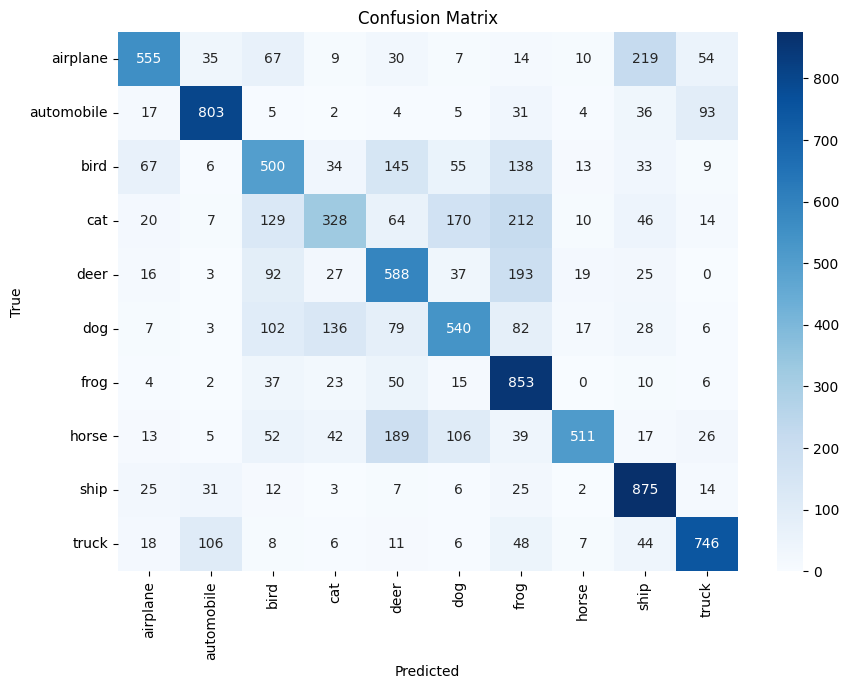

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

# Predict the classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Get the true classes
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
#accuracy  0.73

In [18]:

#save training result into the model
model.save("CIFAR_train.h5")

In [25]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

#load 2nd transfer learning ImageNet the pretrained Model
base_model = InceptionResNetV2(include_top=False, input_shape=(80, 80, 3), weights='imagenet')
base_model.trainable = True

#prevent overwriting
for layer in base_model.layers[:600]:
    layer.trainable = False

#Add Custom Layers
model_tl = Sequential([
    base_model,
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(256, activation="relu"),
    Dropout(0.4),
    Dense(512, activation="relu"),
    Dropout(0.3),
    Dense(10, activation="softmax")
])
# Compile the model
model_tl.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


model_tl.summary()

aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode="nearest",
    validation_split=0.1
)

train_generator = aug.flow(x_train, y_train, batch_size=128, subset='training')
val_generator = aug.flow(x_train, y_train, batch_size=128, subset='validation')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_resnet_v2 (Functional)     │ (None, 1, 1, 1536)          │      54,336,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_422              │ (None, 1, 1, 1536)          │           6,144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,873,066 (209.32 MB)

 Trainable params: 27,118,346 (103.45 MB)

 Non-trainable params: 27,754,720 (105.88 MB)

In [26]:

#train the model
batch_size = 400*2
epochs = 20

model_tl.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[reduce_lr, early_stop]
)
 #accuracy: 0.9058 - val_accuracy: 0.8074

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 178s 343ms/step - accuracy: 0.3678 - loss: 1.8367 - val_accuracy: 0.6818 - val_loss: 0.9277 - learning_rate: 1.0000e-04
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 223ms/step - accuracy: 0.6379 - loss: 1.0384 - val_accuracy: 0.7276 - val_loss: 0.7883 - learning_rate: 1.0000e-04
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 222ms/step - accuracy: 0.7051 - loss: 0.8790 - val_accuracy: 0.7426 - val_loss: 0.7673 - learning_rate: 1.0000e-04
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 222ms/step - accuracy: 0.7266 - loss: 0.8107 - val_accuracy: 0.7512 - val_loss: 0.7285 - learning_rate: 1.0000e-04
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 77s 220ms/step - accuracy: 0.7427 - loss: 0.7598 - val_accuracy: 0.7632 - val_loss: 0.7037 - learning_rate: 1.0000e-04
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.7520 - loss: 0.7326 - val_accuracy: 0.7672 - val_loss: 0.6839 - learning_rate: 1.0000e-04
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 2

In [ ]:
model_tl.save("CIFAR_TL_train.h5")

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_tl.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")
#Test Accuracy: 0.8496

313/313 - 21s - 67ms/step - accuracy: 0.8496 - loss: 0.4653
Test Accuracy: 0.8496, Test Loss: 0.4653


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback to save the best model
checkpoint_callback = ModelCheckpoint(
    'best_model.h5',  # Path where the best model will be saved
    monitor='val_accuracy',  # Metric to monitor (you can use 'val_loss' if you prefer)
    save_best_only=True,  # Save only the best model based on the monitored metric
    mode='max',  # 'max' to save the best model based on highest validation accuracy
    verbose=1  # Show the saving status
)

# Define the number of epochs
epochs = 50

# Train the model with the checkpoint callback
model_tl.fit(
    x_train, y_train,
    batch_size=batch_size, #batch size has already been defined
    epochs=epochs, #use the epochs variable we just defined
    validation_split=0.1,
    callbacks=[checkpoint_callback]  # Include the callback here
)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.9476 - loss: 0.1698
Epoch 1: val_accuracy improved from -inf to 0.96900, saving model to best_model.h5


57/57 ━━━━━━━━━━━━━━━━━━━━ 71s 609ms/step - accuracy: 0.9476 - loss: 0.1697 - val_accuracy: 0.9690 - val_loss: 0.1100
Epoch 2/50
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9537 - loss: 0.1506
Epoch 2: val_accuracy did not improve from 0.96900
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9537 - loss: 0.1507 - val_accuracy: 0.9688 - val_loss: 0.1069
Epoch 3/50
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9553 - loss: 0.1403
Epoch 3: val_accuracy did not improve from 0.96900
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9553 - loss: 0.1403 - val_accuracy: 0.9682 - val_loss: 0.1038
Epoch 4/50
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9585 - loss: 0.1352
Epoch 4: val_accuracy improved from 0.96900 to 0.96940, saving model to best_model.h5


57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.9584 - loss: 0.1352 - val_accuracy: 0.9694 - val_loss: 0.1015
Epoch 5/50
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9606 - loss: 0.1236
Epoch 5: val_accuracy did not improve from 0.96940
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9606 - loss: 0.1236 - val_accuracy: 0.9690 - val_loss: 0.0987
Epoch 6/50
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9645 - loss: 0.1108
Epoch 6: val_accuracy did not improve from 0.96940
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9645 - loss: 0.1109 - val_accuracy: 0.9694 - val_loss: 0.0965
Epoch 7/50
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9675 - loss: 0.1044
Epoch 7: val_accuracy did not improve from 0.96940
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9675 - loss: 0.1044 - val_accuracy: 0.9690 - val_loss: 0.0945
Epoch 8/50
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9703 - loss: 0.0939
Epoch 8: val_accuracy did not improve from

57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.9831 - loss: 0.0592 - val_accuracy: 0.9702 - val_loss: 0.0892
Epoch 13/50
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9838 - loss: 0.0540
Epoch 13: val_accuracy did not improve from 0.97020
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9838 - loss: 0.0540 - val_accuracy: 0.9702 - val_loss: 0.0892
Epoch 14/50
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9869 - loss: 0.0439
Epoch 14: val_accuracy did not improve from 0.97020
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9869 - loss: 0.0440 - val_accuracy: 0.9698 - val_loss: 0.0897
Epoch 15/50
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9881 - loss: 0.0397
Epoch 15: val_accuracy did not improve from 0.97020
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9881 - loss: 0.0397 - val_accuracy: 0.9700 - val_loss: 0.0903
Epoch 16/50
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9895 - loss: 0.0359
Epoch 16: val_accuracy did not impr

In [27]:
# Save the final model
model_tl.save('final_model.h5')


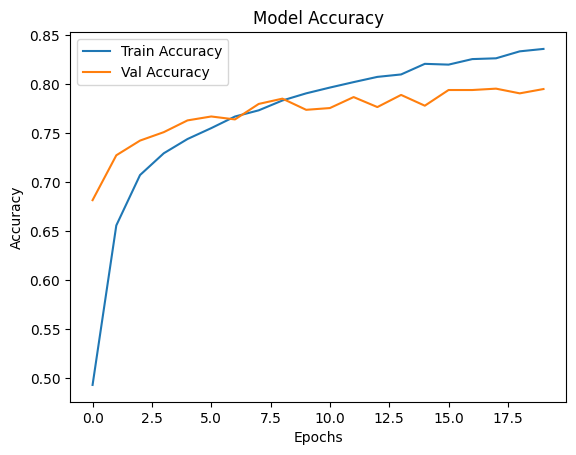

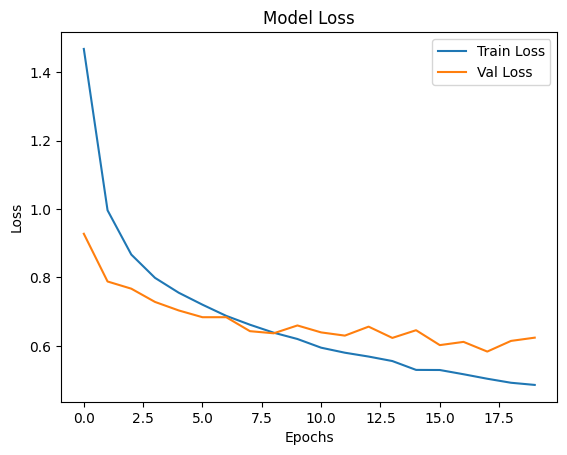

In [28]:
import matplotlib.pyplot as plt

# Plot the accuracy
plt.plot(model_tl.history.history['accuracy'], label='Train Accuracy')
plt.plot(model_tl.history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss
plt.plot(model_tl.history.history['loss'], label='Train Loss')
plt.plot(model_tl.history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [34]:
import requests
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Load image from URL
url = """https://www.nationalgeographic.com/content/dam/expeditions/transports/islander-ii/new-day-2-islander-ii-jan23-1000x666.jpg.adapt.six-sixty-seven.jpg"""
response = requests.get(url, stream=True)

# Open image and ensure it has 3 color channels (RGB)
img = Image.open(response.raw).convert("RGB")  # Ensure RGB mode

# Resize image to match model input size
img = img.resize((80, 80))

# Convert image to NumPy array
img_array = img_to_array(img)

# Ensure only 3 channels (remove alpha if present)
img_array = img_array[:, :, :3]  # Just in case the image has 4 channels
img_array = img_array / 255.0  # Normalize pixel values between 0 and 1
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Check the shape before prediction
print(f"Shape of input image: {img_array.shape}")  # Should be (1, 80, 80, 3)

# Predict using CNN model
prediction_cnn = model.predict(img_array)
predicted_class_cnn = np.argmax(prediction_cnn, axis=1)

# Class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Predicted Class (CNN): {class_names[predicted_class_cnn[0]]}")

# Predict using Transfer Learning model
prediction_tl = model_tl.predict(img_array)
predicted_class_tl = np.argmax(prediction_tl, axis=1)

print(f"Predicted Class (Transfer Learning): {class_names[predicted_class_tl[0]]}")


Shape of input image: (1, 80, 80, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Class (CNN): ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Class (Transfer Learning): ship
